In [17]:
import essentia
from essentia.standard import *
import IPython
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [18]:
IPython.display.Audio('../loops/audio3.wav')

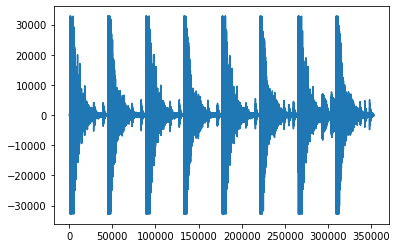

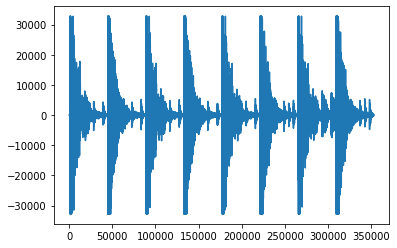

In [5]:
plt.plot(audio[:,1])
plt.show()
plt.plot(audio[:,0])
plt.show()

In [19]:
# Loading audio file in mono
audio = MonoLoader(filename='../loops/audio3.wav')()

# Phase 1: compute the onset detection function
#hfc method
od1 = OnsetDetection(method='hfc')

# Let's also get the other algorithms we will need, and a pool to store the results
w = Windowing(type = 'hann')
fft = FFT() # this gives us a complex FFT
c2p = CartesianToPolar() # and this turns it into a pair (magnitude, phase)
pool = essentia.Pool()

# Computing onset detection functions.
for frame in FrameGenerator(audio, frameSize = 1024, hopSize = 512):
    mag, phase, = c2p(fft(w(frame)))
    pool.add('features.hfc', od1(mag, phase))

# Phase 2: compute the actual onsets locations
onsets = Onsets()

onsets_hfc = onsets(# this algo expects a matrix, not a vector
                    essentia.array([ pool['features.hfc'] ]),

                    # you need to specify weights, but as there is only a single
                    # function, it doesn't actually matter which weight you give it
                    [ 1 ])



# Mark onsets on the audio, which we'll write back to disk
# We use beeps instead of white noise and stereo signal as it's more distinctive

silence = [0.] * len(audio)

#beeps_hfc = AudioOnsetsMarker(onsets=onsets_hfc, type='beep')(silence)
#AudioWriter(filename='audios/audio1_onsets_hfc.mp3', format='mp3')(StereoMuxer()(audio, beeps_hfc))

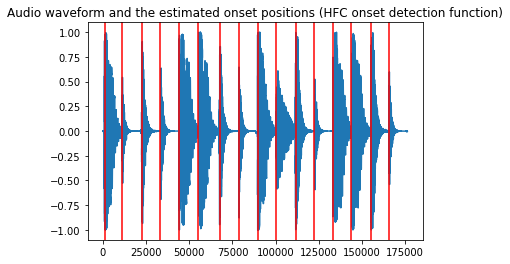

In [20]:
plt.plot(audio)
for onset in onsets_hfc:
    plt.axvline(x=onset*44100, color='red')

plt.title("Audio waveform and the estimated onset positions (HFC onset detection function)")
plt.show()
